# **Concepts Covered:**

- <a href = #link1>Binomial Distribution</a>
- <a href = #link2>Uniform Distribution</a>
- <a href = #link3>Normal Distribution</a>
- <a href = #link4>Central Limit Theorem (CLT)</a>
- <a href = #link5>Point Estimation</a>
- <a href = #link6>Confidence Interval</a>






# <a name='link1'>**Binomial Distribution**</a>

### Problem statement 
80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked

 1. Find the probability that every visitor will end up buying from the souvenir shop
 2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

Let's check first whether we satisfy the assumptions of the binomial distribution.
*  There are only two possible outcomes (success or failure) for each trial – A visitor will buy souvenirs from the souvenir shop or not (yes or no).
* Number of trials (n) is fixed - There are 10 visitors in the sample.
* Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors are independent.
* The probability of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

### Let's import the libraries 

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays.
import matplotlib.pyplot as plt  # library for plots and visualisations
import seaborn as sns  # library for visualisations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions.

### Let's estimate the probability distribution of visitors

In [2]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

In [3]:
# declare p which represents the probability of success, i.e., the probability that a visitor will end up buying souvenir
p = 0.80

In [4]:
# declare different possible number of visitors selected in a numpy array
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

The probability function of Binomial Distribution provides the probability for  x  number of successes from n trials where  p is the probability of success   

>$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$


Here, we know that:

* n  ( number of visitors selected randomly ) = 10
* p ( probability of success i.e., the probability that a visitor will end up buying souvenir) = 0.80
* q ( probability of failure i.e., the probability that a visitor will not end up buying souvenir) = 1 - 0.80 = 0.20
* x ( number of successes ) = 10


We will use binom.pmf() to calculate this probability function which provides the probability for the number of visitors (out of n=10) that will end up buying souvenirs from the souvenir shop.

In [5]:
# import the required function
from scipy.stats import binom

#

In [6]:
#use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p)

In [7]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

As you can see **binomial** is the array of probabilities for different number of successes. Let us visualize the same in the following plot.

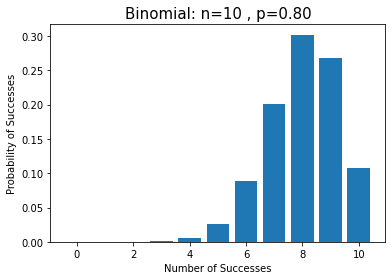

In [8]:
# plot the distribution
plt.bar(k, binomial)
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")
plt.show()

The last element of this **binomial** array represents the probability when the number of successes is 10 ( which means that the 10 visitors (out of 10 selected randomly ) will buy souvenirs from the souvenir shop)

In [9]:
# we can enter the number that we are concerned with
# binomial[10] answers the question:
# what is the chance that 10 people who are selected buy? 

print("What is the chance that a randomly selected group all purchases?")
print("")
num_ppl = int(input("How many people? "))

print("The chance that num_ppl randomly selected people all buy is", "{:.2%}".format(binomial[num_ppl]))


What is the chance that a randomly selected group all purchases?

How many people? 


ValueError: invalid literal for int() with base 10: ''

The above probability shows that the probability of exactly 10 successes is  ~ 0.11.

 Now, we are interested in knowing the probability of at most 7 successes which means what is the probability that out of 10 randomly selected visitors, a maximum of 7 visitors will buy souvenirs from the souvenir shop.

Here, we need to calculate the probability for P(X<=7). CDF is used to calculate the cumulative probability.



**CDF:** of a Random variable(X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$

In our case, Random Variable(X) is the number of visitors who will buy souvenirs from the souvenir shop.

$P(X\leq 7)$



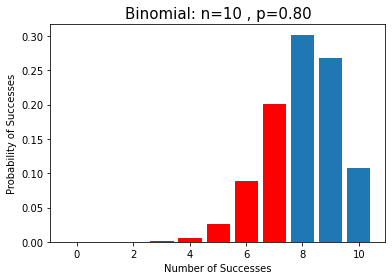

In [10]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, binomial)
plt.title("Binomial: n=%i , p=%.2f" % (n, p), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")
for i in range(0, 8):
    barl[i].set_color("r")
plt.show()

In the above graph, red region represent P(X<=7).
Let's calculate the probability that out of 10 randomly selected visitors, a maximum of 7 will buy souvenirs from the souvenir shop. We will use binom.cdf() for this.

### We can see that CDF adds up all of the probabilities highlighted in red

In [11]:
# calculate cdf
# cdf gives us 
print("{:.2%}".format(binom.cdf(k=7, n=n, p=p)))

binom.cdf(k=7, n=n, p=p)

# chance that >= 8
# we just use 1 - cdf
# in the following, we are asking what are the chances of at least 7 sales: 

1 - binom.cdf(k=7, n=n, p=p)

32.22%


0.6777995264000001

### Conclusion: 

There is 10.74% chance that every visitor will end up buying souvenirs from the souvenir shop.

There is 32.22% chance that a maximum of 7 visitors out of 10 will buy souvenirs from the souvenir shop.

Let's try to change the probability of success (probability that each visitor will buy souvenirs from the souvenir shop) to different values like 60%,70%,90%,95% and visualize how the shape of the distribution changes.


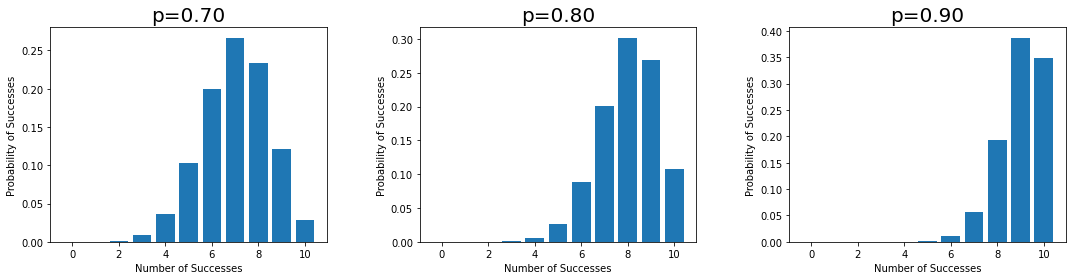

In [21]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
binomial_70 = binom.pmf(k, n, p=0.7)

# plot the distribution of the same
plt.bar(k, binomial_70)
plt.title("p=%.2f" % (0.7), fontsize=20)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(132)
binomial_80 = binom.pmf(k, n, p=0.8)

# plot the distribution of the same
plt.bar(k, binomial_80)
plt.title("p=%.2f" % (0.8), fontsize=20)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(133)
binomial_90 = binom.pmf(k, n, p=0.9)

# plot the distribution of the same
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=20)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)

### Conclusion:

It is clear from the above plot that the shape of the distribution changes as the value of p (probability of success) changes.

#### We can see that the higher probability shifts the distro to the right, which makes sense because we are moving towards 100% chance of success (person buys in this case)

# <a name='link2'>**Uniform Distribution**</a>

### Discrete Uniform Distribution 

### Problem statement

Number of books sold by a bookseller per day is given in 'bookseller.csv'.

Let

X =  Number of books sold by a bookseller per day

X is a Discrete Random variable (because it represent the books count). Let's see the distribution of X and answer the below questions.


1. Find the probability that more than (or equal to) 96 books will be sold on a given day
2. Find the probability that less than (or equal to) 92 books will be sold on a given day

### Reading the Data into the Dataframe

In [17]:
book_count = pd.read_csv("bookseller.csv")
book_count.head(20)

,S.No,Date,Number of Books Sold
0,1,01-01-2020,90
1,2,02-01-2020,100
2,3,03-01-2020,100
3,4,04-01-2020,97
4,5,05-01-2020,93
5,6,06-01-2020,95
6,7,07-01-2020,100
7,8,08-01-2020,96
8,9,09-01-2020,96
9,10,10-01-2020,92


Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum book sold and maximum book sold in a day.

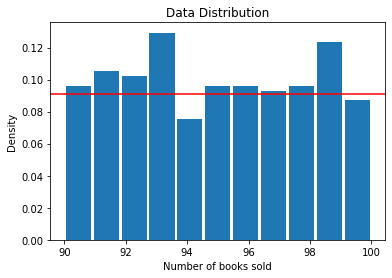

In [16]:
# visualize the distribution of number of books sold
plt.hist(book_count["Number of Books Sold"], 11, rwidth=0.9, density=True)
plt.axhline(1 / 11, color="red")
plt.xlabel("Number of books sold")
plt.ylabel("Density")
plt.title("Data Distribution")
plt.show()

**Insight**: As you can see from the above plot that all the values between 90 and 100 are having almost equal probability, you can assume that the number of books sold follow discrete uniform distribution.

X ~ U(90,100)





In [ ]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
k = np.arange(90, 101)
probs = uniform.pdf(k, loc=90, scale=11)

**Find the probability that more than 96 books will be sold on a given day**

$ P(X\geq 96)$

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

barl = plt.bar(k, probs)

for i in range(6, 11):
    barl[i].set_color("r")
plt.xlabel("Number of books sold")
plt.ylabel("Probability")
plt.title("Discrete Uniform Distribution: X ~ U(90,100)")
plt.show()

In the above graph, red region represent P(X>=96). Let's calculate the probability that more than 96 books will be sold on a given day. We will use uniform.cdf() for this.


In [ ]:
1 - uniform.cdf(96, loc=90, scale=11)

**Find the probability that less than 92 books will be sold on a given day**


$ P(X\leq 92) $

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, probs)

for i in range(0, 3):
    barl[i].set_color("r")
plt.xlabel("Number of books sold")
plt.ylabel("Probability")
plt.title("Discrete Uniform Distribution: X ~ U(90,100)")
plt.show()

In the above graph, red region represent P(X<=92). Let's calculate the probability that less than 92 books will be sold on a given day. We will use uniform.cdf() for this.

In [ ]:
uniform.cdf(93, loc=90, scale=11)

### Conclusion:

There is 45.45% chance that more than 96 books will be sold on a given day.

There is 27.27% chance that less than 92 books will be sold on a given day.


### Continuous Uniform Distribution 





### Problem statement


 IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let

X = Time needed to fix bugs


X is a continuous random variable. Let's see the distribution of X and answer the below questions.


1. Find the probability that a randomly selected software debugging requires less than three hours

2. Find the probability that a randomly selected software debugging requires more than two hours

3. Find the 50th percentile of the software debugging time





### Reading the Data into the Dataframe

In [ ]:
debugging = pd.read_csv("debugging.csv")
debugging.head()

Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum time required and maximum time required for bug fixing.

In [ ]:
# visualize the distribution of the time needed for bug fixing
plt.hist(debugging["Time Taken to fix the bug"], density=True)
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

Another way to recognize a uniform distribution in your data is to look at a density plot. We will use distplot of seaborn library to visualize the distribution of time needed for bug fixing.

In [ ]:
# Density plot of time taken to fix the bug
sns.distplot(debugging["Time Taken to fix the bug"])
plt.show()

**Insight**: As you can see from the above plot that all the values between 1 and 5 are having almost equal probability, we are going to use continuous uniform distribution. We need to decide the endpoints. Here, endpoints are 1 and 5.

X ~ U(1, 5)

In [ ]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4)

**Find the probability that a randomly selected software debugging requires a maximum time of 3 hours** 

**CDF:** of a random variable(X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$


In our case, random variable(X) is the number of hours.

$ P(X\leq 3)$

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In the above graph, red region represent P(X<=3). Let's calculate the probability that that a randomly selected software debugging requires a maximum time of 3 hours . We will use uniform.cdf() for this.

In [ ]:
uniform.cdf(x=3, loc=1, scale=4)

**Find the probability that a randomly selected software bug fixing requires more than two hours.**

$ P(X>2)$

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(2, 5, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In the above graph, orange region represent P(X>2). Let's calculate the probability that that that a randomly selected software debugging requires more than two hours. We will use uniform.cdf() for this.

In [ ]:
1 - uniform.cdf(x=2, loc=1, scale=4)

**Let's calculate the 50th percentile of software debugging time.**

ppf(): It is used to calculate the percentile point given probability. It works opposite of cdf()

In [ ]:
uniform.ppf(q=0.5, loc=1, scale=4)

### Conclusion:  

There is a 50% chance that a randomly selected software debugging requires less than three hours.

There is an 75% chance that a randomly selected software debugging requires more than two hours.

The 50th percentile of the software debugging time is 3 hours.

# <a name='link3'>**Normal Distribution**</a>

### Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3.  Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%



### Reading the Data into the Dataframe

In [ ]:
sat_score = pd.read_csv("sat_score.csv")
sat_score.head()

### Calculating the mean and standard deviation (parameters) of the SAT score 



In [ ]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the SAT scores data
mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

### Plotting the Distribution 

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from data

In [ ]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame()
density["x"] = np.linspace(
    sat_score["score"].min() - 0.01, sat_score["score"].max() + 0.01, 100
)
density["pdf"] = norm.pdf(density["x"], mu, sigma)

fig, ax = plt.subplots()
# plot the distribution of data using histogram
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density")
# plot the pdf of the normal distribution
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()

**Insight:**  As you  can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and red curve represnts the PDF ( Probability density function ). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on normality assumption.

X ~ N(mu, sigma)

**Calculate the probability that a student will score less than 800 in SAT exam.**

In [ ]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(
    "The probability that a student will score less than 800 is",
    round(prob_less_than_800, 4),
)

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=800, c="r")
x1 = np.linspace(density["x"].min(), 800, 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the probability that a student will score more than 1300 in SAT exam.**

In [ ]:
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 1300
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
print(
    "The probability that a student will score more than 1300 is",
    round(prob_greater_than_1300, 4),
)

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300, c="r")
x1 = np.linspace(1300, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to to be in the 90th percentile**

In [ ]:
# calculate the 90th percentile score using ppf() function
# norm.ppf() calculates the percentile point
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [ ]:
# calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Conclusion:** 

1) Only 15.51% students will score below 800 and 7.62% students will score above 1300. It shows that 2020 SAT exam's complexity is moderate. 

2) Student should score at least 1269 to secure 90th percentile.

3) Student should score at least 1344 to be in the top 5%.

### Standardization of Normal Variables

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5. 

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30. 

Help the college to choose the best candidate for the fellowship!

In [ ]:
# plot the two distribution for SAT and ACT scores
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b')
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350, ymax = 0.23, linestyle = '--', color = 'green')
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc = 20, scale = 5), color = 'r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')
plt.show()

In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

In [ ]:
# find the Z-score of highest scorer in SAT among all the applicants
top_sat = (1350 - 1200) / 200
print('The Z-score of highest scorer in SAT among all the applicants', top_sat)
# find the Z-score of highest scorer in ACT among all the applicants
top_act = (30 - 20) / 5
print('The Z-score of highest scorer in ACT among all the applicants', top_act)

Let's plot the standard normal distribution and visualize the above standardized scores.

In [ ]:
# plot the standard normal distribution
# and visualize the standardized scores
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat, ymax = 0.75, linestyle = '--', color = 'green')
ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

In the above plot, the green line represents the standardized highest SAT score of the applicants which is 0.75 standard deviation above the mean and the black line represents the standardized highest ACT score of the applicants which is 2 standard deviations above the mean.

This means that among the applicants, the highest scorer in ACT performed better than the highest scorer in SAT.

Thus, the top performer fellowship should be given to the applicant who has scored highest in ACT.

# <a name ='link4'>**Central Limit Theorem (CLT)**</a>


Central Limit Theorem states that if we independently draw multiple samples from a population, take mean of each sample and plot these (sample means), then the plot will tend to normal distribution as the size of samples increases, **regardless** of the shape of the population distribution.

### Let's watch CLT in action using a python simulation

#### Here is a Uniform Distribution (which is most definitely *not Normal*)

In [ ]:
# importing the required function
from scipy.stats import uniform

# setting the seed for reproducibility
np.random.seed(1)
# creating a uniform distribution population of size 100000
uniform_pop = uniform.rvs(0, 10, size=100000)
# visualizing the uniform distribution
plt.hist(uniform_pop)
plt.title("Uniform Distribution Population")
plt.xlabel("X~U(0,10)")
plt.ylabel("Count")
plt.show()

#### Let's create a sampling distribution from this population (sample size=5, number of samples = 500)

*   draw a sample of size 5, so n=5, we draw 5 independent observations
*   get the mean of these 5 observations, i.e - sample mean
*   repeat the above 2 steps 500 times, so that we get 500 sample means, where n=5 

Now, let's observe the shape of this sampling distribution.

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 5
n = 5
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Let's create another sampling distribution from this population, increase the sample size to 15 (n=15)

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 15
n = 15
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Increase the sample size to 30 (n=30)

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 30
n = 30
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Increase the sample size to 50 (n=50)

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 50
n = 50
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(uniform_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Insight

* Observe how the sampling distribution moves closer to normality as the sample size increases.

#### When the population distribution is Normal

In [ ]:
# import the required function
from scipy.stats import norm

# set the seed for reproducibility
np.random.seed(1)
# create a normal distribution population of size 100000
normal_pop = norm.rvs(0, 1, size=100000)
# visualize the normal distribution
plt.hist(normal_pop, 200)
plt.title("Normal Distribution Population")
plt.xlabel("X~N(0,1)")
plt.ylabel("Count")
plt.show()

#### Let's create a sampling distribution from this population (sample size=5, number of samples = 500)

*   draw a sample of size 5, so n=5, we draw 5 independent observations
*   get the mean of these 5 observations, i.e - sample mean
*   repeat the above 2 steps 500 times, so that we get 500 sample means, where n=5 

Now, let's observe the shape of this sampling distribution.

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 5
n = 5
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
  # draw a sample of size n
  sample = np.random.choice(normal_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()


#### Insight

* When the population distribution is Normal, sampling distribution is close to normal for even the smaller sampling sizes like n = 5

#### Let's Check Sampling Distribution for Sample Size n = 15

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 15
n = 15
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(normal_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Sampling Distribution when Sample Size n = 30



In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 30
n = 30
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(normal_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Let's see if CLT works if the population distribution is Exponential Distribution (which again is clearly *not Normal*)

In [ ]:
# import the required function
from scipy.stats import expon

# set the seed for reproducibility
np.random.seed(1)
# create a exponential distribution population of size 100000
exp_pop = expon.rvs(size=100000)
# visualize the exponential distribution
plt.hist(exp_pop, 200)
plt.title("Exponential Distribution Population")
plt.xlabel("X~Exp(1)")
plt.ylabel("Count")
plt.show()

#### Sampling Distribution for Sample Size n = 5

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 5
n = 5
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
  # draw a sample of size n
  sample = np.random.choice(exp_pop, size = n)
  # calculate the sample mean
  sample_mean = np.mean(sample)
  # append the sample mean to the sample_means list
  sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde = True)
plt.title('Distribution of Sample Means for n = ' + str(n))
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()


#### Sampling Distribution for Sample Size - 15

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 15
n = 15
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(exp_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Sampling Distribution for Sample Size - 30

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 30
n = 30
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(exp_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

#### Sampling Distribution for Sample Size - 50

In [ ]:
# set the seed for reproducibility
np.random.seed(1)
# set the sample size to 50
n = 50
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    # draw a sample of size n
    sample = np.random.choice(exp_pop, size=n)
    # calculate the sample mean
    sample_mean = np.mean(sample)
    # append the sample mean to the sample_means list
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

### Key Takeaway

* We have tried different distributions to simulate the fundamental idea of CLT. We can clearly see that no matter what the shape of the population distribution is, the plot of samples means approximately tends to normal distribution as sample size increases.

# <a name='link5'>**Point Estimation**</a>

#### Let's see how population mean is estimated by the sample mean

A non-profit organization sampled the files of the local forest department to come up with the following amounts (in thousands of dollars) of damages for 10 wildfire incidents:

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

What is the estimate of the average amount of damage in wildfires, in that area?

In [ ]:
# get the sample data
sample = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])

# find the mean of the sample
x_bar = np.mean(sample)
x_bar

#### Insight
* The estimate of the average amount of damages in wildfires in that area is $69000.

Usually  point  estimate  of  an  unknown  population  parameter  is  the  corresponding  sample statistic. 

For example:

a. Population mean μ is estimated by sample mean x̅.

b. Population median is estimated by sample median x̃.

c. Population proportion of success π is estimated by sample proportion of success p

# <a name='link6'>**Confidence Interval**</a>

#### **Let's see how confidence interval is constructed for the population mean when std dev is known**

It is rarely the case when you know the population standard deviation and not the mean. However, it may not be as unlikely an assumption as it seems. For a tight manufacturing process which is in place for a long time, the variability in the process may be controlled, but with small changes in temperature or humidity, the mean may change.


Let's construct the confidence interval for an example where the population mean is unknown and the standard deviation is known.



The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new coffee machine. The mean of the sample is found to be 110 mg. It is known that the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.





In [ ]:
# import the required function
from scipy.stats import norm

# set the values of sample mean and sigma
x_bar, sigma = 110, 7

# set the value of sample size
n = 50

# construct the confidence interval
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.06 mg and 111.94 mg.

#### **Let's see how confidence interval is constructed for the population mean when std dev is unknown**

The example discussed above is based on the assumption that the population standard deviation is known. However, in the majority of cases that assumption will not be satisfied.

When we do not know the population standard deviation, it can be estimated from the sample. In this case, the sample mean follows Student's t distribution with (n-1) degrees of freedom. 

Just like the normal distribution, t-distribution is also very useful in statistical inference. It is a symmetric distribution around 0. For a very large d.f., t distribution is almost identical to standard normal distribution.The parameter of t-distribution is known as degrees of freedom.

Below is the graph of t-distribution for various degrees of freedom(k). We can notice that the distribution approximates to normal as the value of k inceases.

In [ ]:
# import the required function
from scipy.stats import t
from scipy.stats import norm

# set the values for x
x = np.linspace(-3, 3, 100)

# plot the t distribution for different values of k
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))
axes = axes.ravel()
for i, k in zip(range(6), [1, 2, 3, 5, 10, 30]):
    ax = axes[i]
    ax.plot(x, t.pdf(x, df=k), color="blue", label="t dist")
    ax.plot(x, norm.pdf(x), color="red", label="normal dist")
    ax.set_title("t-distribution for k={0}".format(k))
    ax.legend(loc="upper right", fontsize=10)
plt.tight_layout()

Let's use the t-distribution to construct the confidence interval for the mean when statndard deviation is unknown.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new machine. The mean of the sample is found to be 110 mg and the sample standard deviation is estimated to be 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [ ]:
# import the required function
from scipy.stats import t

# set the values of sample mean and sample standard deviation
x_bar, s = 110, 7

# set the value of sample size and degrees of freedom
n = 50
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2)

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.01 mg and 111.99 mg.

#### Key Takeaways

* The confidence interval for population mean can be constructed for both cases when the population standard deviation is known and when it is unknown. The latter case is more common which demands application of t-distribution with appropriate degrees of freedom.


* The general approach to construction of confidence interval is to use the appropriate sample statistic to estimate the population parameter and use the proper percentile point of the sampling distribution.